# PCA

## Load data

In [133]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as PCA
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

scale = StandardScaler()
data = pd.read_csv(".data.csv")
y = data["y"]
data = data.drop(columns = ["y"], axis=1, inplace = False)

data = preprocessing.normalize(data,axis= 0)
x = scale.fit_transform(data)

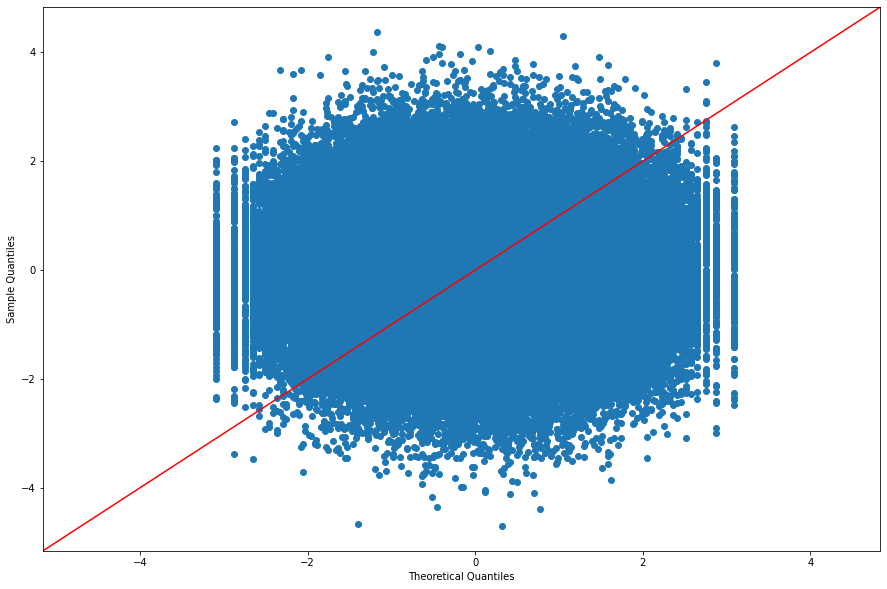

In [135]:
import statsmodels.api as sm
from scipy.stats import norm
import pylab

sm.qqplot(x, line='45')
pylab.show()

## Question 1

Use PCA to reduce the size of the feature space while retaining 90% of the explained variance. What is the size of the transformed feature space? (Number of features in the reduced dataset)

You should keep target column `y` as is (don't include in PCA)

In [136]:




covar_matrix = PCA(9) 

covar_matrix.fit(x)
variance = covar_matrix.explained_variance_ratio_ 

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
print('Explained vairance by features',var) 

reduced_pca = PCA(n_components=0.9)
reduced_90 = reduced_pca.fit_transform(x)
print('Reduced Feature Space:',np.sum(reduced_pca.explained_variance_ratio_))

print('Number of components:', reduced_pca.n_components_)

Explained vairance by features [ 1.5  2.9  4.3  5.5  6.5  7.5  8.5  9.5 10.4]
Reduced Feature Space: 0.9017505372593804
Number of components: 152


In [137]:
Q3 =reduced_90 ## Will use this later.
Q3

array([[ 0.55317971, -0.46071703,  0.66938757, ...,  1.08990794,
        -0.04886947,  0.49769349],
       [-1.74071285, -1.34620884,  2.3494279 , ...,  0.65940205,
        -0.43812501, -0.00886561],
       [ 3.34558136,  1.29770847,  0.41723705, ...,  0.26472805,
        -1.07578832,  0.11006644],
       ...,
       [-2.8289727 , -0.94977776,  0.24813362, ..., -0.31659608,
        -1.34716526,  0.85134355],
       [-0.73091368,  0.06204287, -2.39792749, ..., -0.2328755 ,
         0.41404863, -1.57470554],
       [ 3.59289927, -1.7280652 , -1.33434532, ...,  0.88010769,
        -1.25877712,  1.80344098]])

## Question 2

Use original dataset. Split it to Train and Test, 80/20 ratio. 

Train a SVC with kernel 'rbf', gamma = 'auto', and C = 10. 
Target column is `y`. 

Report following metrics on test dataset:
- Confusion matrix
- F1 weighted

Set random_state = 142 on all models and functions with this argument.

In [148]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()

data = pd.read_csv("./lab_7_data.csv")
y = data["y"]
y
data = data.drop(columns = ["y"], axis=1, inplace = False)
data = preprocessing.normalize(data,axis= 0)
x = scale.fit_transform(data)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = .8, random_state = 142)

In [149]:
svc = SVC(kernel = 'rbf',
            gamma = 'auto',
            C = 10, 
            random_state = 142)

svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

labels = np.unique(y_test)
confusion = metrics.confusion_matrix(y_test, y_pred, labels = np.unique(y_test))

print('Confusion matrix')
print(pd.DataFrame(confusion, index=labels, columns=labels))
print()
print('SVC f1 weighted score')
print(f1_score(y_test, y_pred, average = 'weighted'))

Confusion matrix
    0   1
0  89  21
1  10  80

SVC f1 weighted score
0.8453844034169193


## Question 3

#### Here I train the SVC model with the parameters: kernel = 'rbf', gamma = 'auto', and C = 10
#### We set this on the random state = 142.

#### The F1 weighted score is provided below alond with the labeled confusion matrix.

In [140]:
from sklearn.svm import SVC
### training the SVC
x_train, x_test, y_train, y_test = train_test_split(Q3, y, train_size = .8, random_state = 142)
## y has already been defined in Q2


svc = SVC(kernel = 'rbf',
            gamma = 'auto',
            C = 10, 
            random_state = 142)

svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

labels = np.unique(y_test)
confusion = metrics.confusion_matrix(y_test, y_pred, labels = np.unique(y_test))

print('Confusion matrix')
print(pd.DataFrame(confusion, index=labels, columns=labels))
print()
print('SVC f1 weighted score')
print(f1_score(y_test, y_pred, average = 'weighted'))

Confusion matrix
    0   1
0  92  18
1   8  82

SVC f1 weighted score
0.8703258145363408


# Question 4

#### I train a glrm model here and provide two pairs of two different points that are near each other, where the points are the col
#### in a scatterplot.
#### These are the following parameters used.
```
rank2_model = H2OGeneralizedLowRankEstimator(k=2,
                                             model_id = "rank2", 
                                             seed = 1234, 
                                             loss="Absolute",
                                             transform="standardize",
                                             representation_name="rank2_full")

```
#### I then convert the two points that are near each other, which were found by sorting the values, into numpy arrays to be used
#### to calculate the eculidean distance as well as plotting the two pairs.


In [141]:
import h2o
try:
    h2o.cluster().shutdown()
except:
    pass 
#Limit to 3 threads and 4GB memory
h2o.init(nthreads=3, max_mem_size=8)
from h2o.estimators import H2OGeneralizedLowRankEstimator

# Import Data
data = h2o.import_file("./lab_7_data.csv")
data.head()

H2O session _sid_a698 closed.
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 17.0.2+8-LTS-86, mixed mode, sharing)
  Starting server from C:\Users\monta\OneDrive\Desktop\BUAN_AML\ml-spring-2022\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\monta\AppData\Local\Temp\tmpqp2om8j2
  JVM stdout: C:\Users\monta\AppData\Local\Temp\tmpqp2om8j2\h2o_monta_started_from_python.out
  JVM stderr: C:\Users\monta\AppData\Local\Temp\tmpqp2om8j2\h2o_monta_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.1
H2O_cluster_version_age:,3 months and 13 days !!!
H2O_cluster_name:,H2O_from_python_monta_ok1xxy
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,8 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,3
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,col_71,col_72,col_73,col_74,col_75,col_76,col_77,col_78,col_79,col_80,col_81,col_82,col_83,col_84,col_85,col_86,col_87,col_88,col_89,col_90,col_91,col_92,col_93,col_94,col_95,col_96,col_97,col_98,col_99,col_100,col_101,col_102,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,col_112,col_113,col_114,col_115,col_116,col_117,col_118,col_119,col_120,col_121,col_122,col_123,col_124,col_125,col_126,col_127,col_128,col_129,col_130,col_131,col_132,col_133,col_134,col_135,col_136,col_137,col_138,col_139,col_140,col_141,col_142,col_143,col_144,col_145,col_146,col_147,col_148,col_149,col_150,col_151,col_152,col_153,col_154,col_155,col_156,col_157,col_158,col_159,col_160,col_161,col_162,col_163,col_164,col_165,col_166,col_167,col_168,col_169,col_170,col_171,col_172,col_173,col_174,col_175,col_176,col_177,col_178,col_179,col_180,col_181,col_182,col_183,col_184,col_185,col_186,col_187,col_188,col_189,col_190,col_191,col_192,col_193,col_194,col_195,col_196,col_197,col_198,col_199
0.416251,0.187764,1.39273,0.302238,-0.0531831,-1.59861,1.44132,-0.0335995,-0.163162,0.0164152,-0.738478,-1.84971,1.81947,0.0418063,-1.35822,1.3109,-0.723951,-1.99558,0.293012,-1.30577,-0.41234,0.68546,1.88746,1.77361,-0.351711,-1.05013,0.251686,-1.42131,-1.2733,1.01172,0.26003,0.825121,-0.108814,0.780638,0.637224,-0.9503,0.173089,0.150942,-0.0305828,0.45466,-1.40532,-0.0967276,0.0618317,2.05136,-0.865441,0.610649,-0.418626,-1.43112,1.49209,-0.161552,-1.24324,0.543092,-1.50118,1.22453,0.293119,0.101657,0.52998,-1.03241,0.185001,-1.01106,-0.162705,0.485731,-0.671475,-1.74282,1.5715,-0.0718316,0.637127,0.45079,-0.410897,0.297313,-0.460079,-1.35733,-0.571346,2.00468,1.55825,0.796877,-0.226563,0.643372,-4.9751,1.09305,0.147693,-0.473244,-0.456848,1.88188,-0.224817,0.959515,1.46294,-1.25663,-0.0998353,0.624259,0.0934701,-0.823858,1.16898,1.3678,-0.496845,-0.800347,0.244775,0.0165619,0.761913,-1.00149,0.689013,-1.00227,1.17933,1.27233,1.8488,-0.756218,0.722778,1.11239,-0.0576231,-0.296038,0.879889,-1.56128,1.26778,-1.2823,-0.873289,2.08332,-0.456981,-0.0327925,-0.632079,-0.247328,0.0421456,0.675244,0.469047,-0.379155,0.69398,-0.102418,-0.804938,-0.654579,-2.37742,-0.338895,0.144955,-0.618801,0.39345,-0.230672,-1.8356,0.0728309,-1.28117,1.75176,0.474793,-2.30184,-1.5324,0.26262,-0.0993723,-0.12701,-2.93816,0.235647,-0.803401,-0.0218766,1.83169,0.372421,-0.376905,-0.973555,-0.54647,0.475447,0.520637,-0.06481,0.132856,-0.68471,1.62183,-0.93621,2.25076,0.324182,-3.08533,0.767323,-0.125211,0.339742,0.0457274,0.380506,-0.546514,-0.434207,0.763424,-1.07725,-0.176497,-0.414853,-1.21893,-0.110836,1.15252,3.4912,-0.389255,0.752048,0.176269,0.646345,0.860553,-0.435836,0.123867,0.679564,0.559306,0.192639,0.611412,-1.0137,2.66367,-1.12925,-1.87481,-0.599429,1.41614,-0.176389,-0.431767,1.3005,1.53108,-0.880436
-0.890983,-0.794026,0.251547,0.0100257,-3.30286,-0.634802,-0.650848,-0.247151,-0.455664,1.0749,-0.800816,-0.310957,-5.37735,-1.01944,-0.246994,-5.93199,-0.349498,-0.820743,-6.14741,-0.020613,0.93899,4.74535,10.7213,-2.00214,1.24333,1.0428,0.25924,-1.53242,-1.16892,1.02192,-0.0885617,0.704052,1.38288,-1.0932,-0.450838,0.386544,-1.28155,-0.747141,-1.76145,-0.762084,-0.882164,-0.0345333,-1.41859,-2.55517,-0.0748364,3.50997,-1.17616,0.108852,0.992169,-0.503793,-0.717657,0.105137,-0.449123,-0.573706,-0.42745,0.637566,-1.6538,-0.239487,-0.306202,-1.06277,-0.991776,0.215169,0.404328,1.14434,12.9281,1.23785,-0.154762,-0.241385,-1.31052,-0.540513,0.959618,0.138273,-0.185039,-2.1032,-1.7132

In [143]:
x = [x for x in data.columns if x not in ['y']]

rank2_model = H2OGeneralizedLowRankEstimator(k=2,
                                             model_id = "rank2", 
                                             seed = 1234, 
                                             loss="Absolute",
                                             transform="standardize",
                                             representation_name="rank2_full")

rank2_model.train(training_frame=data, 
                  x=x
                 )

glrm Model Build progress: |█████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLowRankEstimator :  Generalized Low Rank Modeling
Model Key:  rank2


Model Summary: 


,,number_of_iterations,final_step_size,final_objective_value
0,,1000.0,0.002081,157702.812594




ModelMetricsGLRM: glrm
** Reported on train data. **

MSE: NaN
RMSE: NaN
Sum of Squared Error (Numeric): 197588.6280982432
Misclassification Error (Categorical): 0.0

Scoring History: 


,,timestamp,duration,iterations,step_size,objective
0,,2022-04-11 18:46:47,0.236 sec,0.0,1.050000,159347.069090
1,,2022-04-11 18:46:47,0.246 sec,1.0,1.102500,159322.040813
2,,2022-04-11 18:46:47,0.261 sec,2.0,0.735000,159322.040813
3,,2022-04-11 18:46:47,0.277 sec,3.0,0.771750,159151.952754
4,,2022-04-11 18:46:47,0.292 sec,4.0,0.810338,159018.003600
5,,2022-04-11 18:46:47,0.308 sec,5.0,0.850854,158880.641956
6,,2022-04-11 18:46:47,0.324 sec,6.0,0.893397,158707.278649
7,,2022-04-11 18:46:47,0.324 sec,7.0,0.938067,158560.703514
8,,2022-04-11 18:46:47,0.339 sec,8.0,0.984970,158468.102219
9,,2022-04-11 18:46:47,0.355 sec,9.0,0.656647,158468.102219



See the whole table with table.as_data_frame()


In [144]:
X = h2o.get_frame("rank2_full")
Y = rank2_model.archetypes()
print(X.shape)
print(len(Y), len(Y[0]))

(1000, 2)
2 200


In [145]:
import pandas as pd

archetypes_cols = rank2_model._model_json["output"]["archetypes"].as_data_frame().reset_index(drop=True).columns.to_list()
### create col list names

archetypes_y = pd.DataFrame({'x':Y[0],'y':Y[1], 'attribute':archetypes_cols[1:]})
### now create df by Arch1 and Arch2

archetypes_y["Distance"]= abs(archetypes_y["y"]-archetypes_y["x"])
### add a distance col by absolute value

sorted_= archetypes_y[archetypes_y['Distance'].between(-.5, .5)].sort_values(by= 'y' ,ascending = True)
print(sorted_)

            x         y attribute  Distance
173  0.155516 -0.328580   col_173  0.484095
160  0.152008 -0.271071   col_160  0.423079
44   0.182148 -0.258661    col_44  0.440809
54   0.013920 -0.246465    col_54  0.260385
186  0.151058 -0.242680   col_186  0.393738
..        ...       ...       ...       ...
179 -0.108526  0.234987   col_179  0.343513
163 -0.227748  0.238324   col_163  0.466072
194 -0.223964  0.268524   col_194  0.492488
24  -0.171002  0.270301    col_24  0.441304
191 -0.134571  0.297910   col_191  0.432481

[147 rows x 4 columns]


### Now we use the converted columns to specify two pairs, then convert to arrays so that we may use the
### euclidean model to find the distance

In [146]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as pl
import random
from scipy.spatial import distance

x_y = sorted_
x_y = x_y.drop(labels = 'Distance', axis = 1)

a = x_y.iloc[[0]] ## col 173
b = x_y.iloc[[1]] ## col 160
c = x_y.loc[x_y['attribute'] == 'col_123'] ## col 123
d = x_y.loc[x_y['attribute'] == 'col_131'] ## col 131

a = a.drop(labels = 'attribute', axis = 1)
b = b.drop(labels = 'attribute', axis = 1)
c = c.drop(labels = 'attribute', axis = 1)
d = d.drop(labels = 'attribute', axis = 1)


print('First pair is col 173 and 160')
print(a)
print(b)
print()
print('Second pair is col 123 and 131')
print(c)
print(d)

a = np.array(a)
b = np.array(b)
c = np.array(c)
d = np.array(d)

print()
pair1 = distance.euclidean(a, b)
print('The euclidean distance between the first pair, col 173 and 160, is:',pair1)
print()
pair2 = distance.euclidean(c,d)
print('The euclidean distance between the second pair, col 123 and 131, is:',pair2)

First pair is col 173 and 160
            x        y
173  0.155516 -0.32858
            x         y
160  0.152008 -0.271071

Second pair is col 123 and 131
            x         y
123  0.010104  0.015317
            x         y
131 -0.008717 -0.018482

The euclidean distance between the first pair, col 173 and 160, is: 0.057615377746277306

The euclidean distance between the second pair, col 123 and 131, is: 0.038685968699157754


### Here is the plot of the two pairs. 

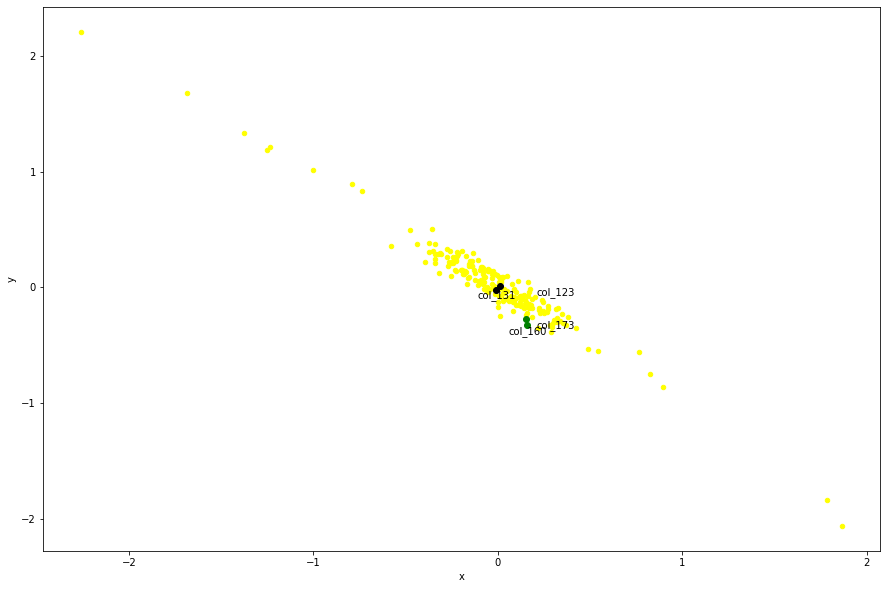

In [147]:
pl.rcParams['figure.figsize'] = [15, 10]

ax1 = archetypes_y.plot.scatter(x='x',
                                y='y',
                                c='yellow')

for i, txt in enumerate(archetypes_cols[1:]):
      if txt in ["col_123", "col_131","col_160","col_173"]:
            c='red'
            ax1.annotate(txt, (Y[0][i]+random.uniform(-.2,.2), Y[1][i]+random.uniform(-.2,.2)))
            
ax1.scatter(archetypes_y[(archetypes_y['attribute'] == 'col_123')]['x'],archetypes_y[(archetypes_y['attribute'] == 'col_123')]['y'], color='black')
ax1.scatter(archetypes_y[(archetypes_y['attribute'] == 'col_131')]['x'],archetypes_y[(archetypes_y['attribute'] == 'col_131')]['y'], color='black')


ax1.scatter(archetypes_y[(archetypes_y['attribute'] == 'col_160')]['x'],archetypes_y[(archetypes_y['attribute'] == 'col_160')]['y'], color='green')
ax1.scatter(archetypes_y[(archetypes_y['attribute'] == 'col_173')]['x'],archetypes_y[(archetypes_y['attribute'] == 'col_173')]['y'], color='green')

#Don't display output of matplotlib
# pl.close()